In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers, initializers, Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dir = "D:/career/datasets/GENDER/train"
test_dir = "D:/career/datasets/GENDER/test"

batch_size = 32
img_size = 224

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=batch_size,
                                                      image_size=(img_size, img_size))

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                     batch_size=batch_size,
                                                     image_size=(img_size, img_size))

Found 220 files belonging to 2 classes.
Found 80 files belonging to 2 classes.


In [4]:
class_names = ['man', 'woman']
class_names

['man', 'woman']

In [5]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

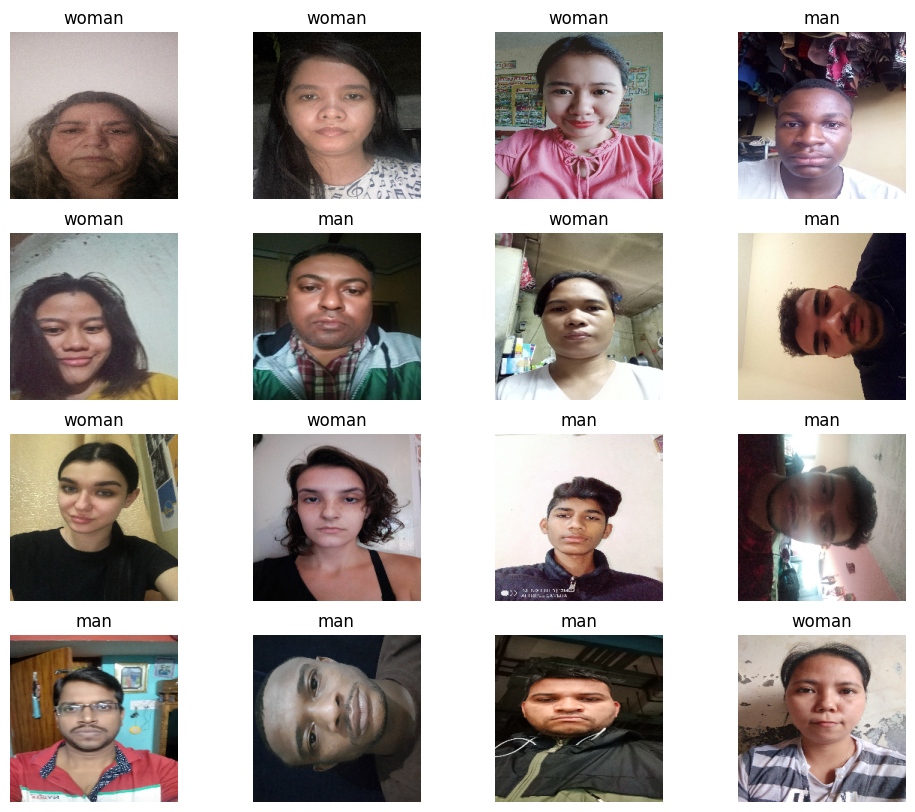

In [6]:
for image, label in train_ds.take(1):
    plt.figure(figsize=(12, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

# 0 is man , 1 is woman

In [7]:
label[:16]

<tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])>

In [8]:
#data augmentation for 

data_augmentation = Sequential([
    tf.keras.layers.Resizing(180, 180),
    tf.keras.layers.RandomFlip("horizontal_and_vertical")
])

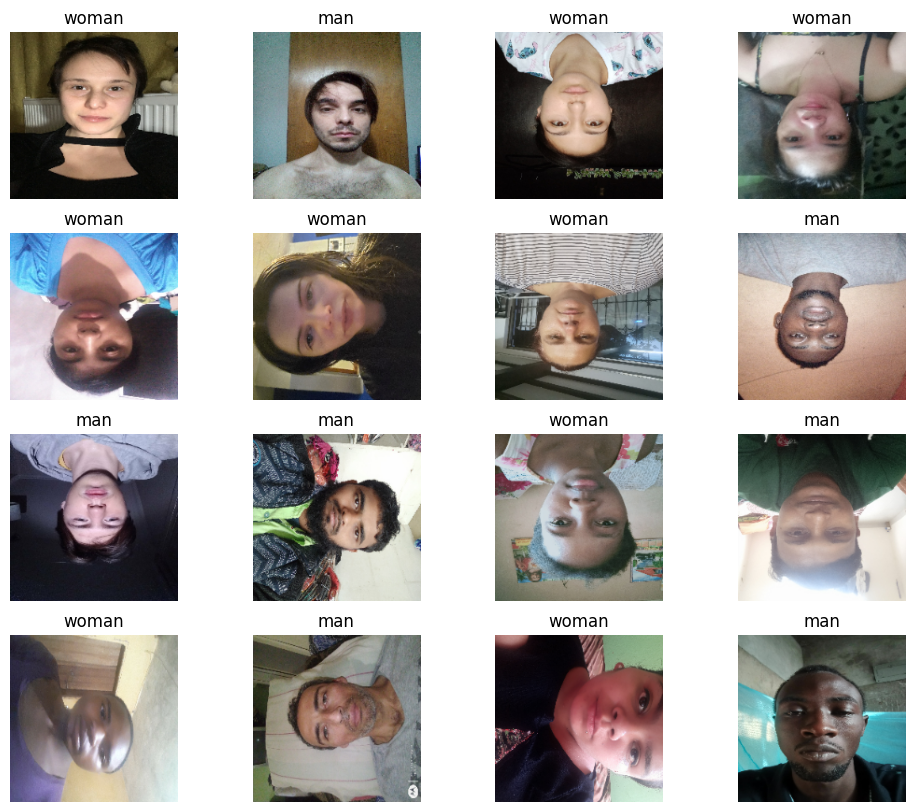

In [9]:
#Visualize Augmented Image

for image, label in train_ds.take(1):
    plt.figure(figsize = (12,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        augmented_image = data_augmentation(image)
        plt.imshow(augmented_image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [35]:
from tensorflow.keras.layers import BatchNormalization

In [36]:
regularizer = regularizers.l1(0.001)
initializer = initializers.HeNormal(seed=30)

model = Sequential([
    data_augmentation,
    Conv2D(64, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    BatchNormalization(),  # Add batch normalization
    MaxPooling2D((2, 2)),
    Conv2D(128, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Increase dropout rate
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

In [37]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
history = model.fit(train_ds, epochs=30)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3332 - loss: 25.9615
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6309 - loss: 21.5378
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6737 - loss: 20.3833
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6646 - loss: 21.2998
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6544 - loss: 18.3827
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7437 - loss: 15.6350
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8248 - loss: 14.8681
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7689 - loss: 15.6067
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8072 - loss: 14.7450
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8727 - loss: 14.1329
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7913 - loss: 14.3416
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8498 - loss: 13.7160
E

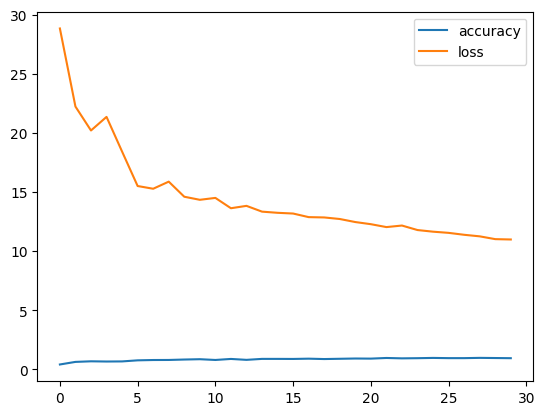

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()

In [40]:
from sklearn.metrics import f1_score

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[0]


C:\Users\suhai\AppData\Local\Temp\ipykernel_9660\648857639.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Original Label: {class_names[label[i]]} -- Predicted label: {class_names[int(prediction)]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/s

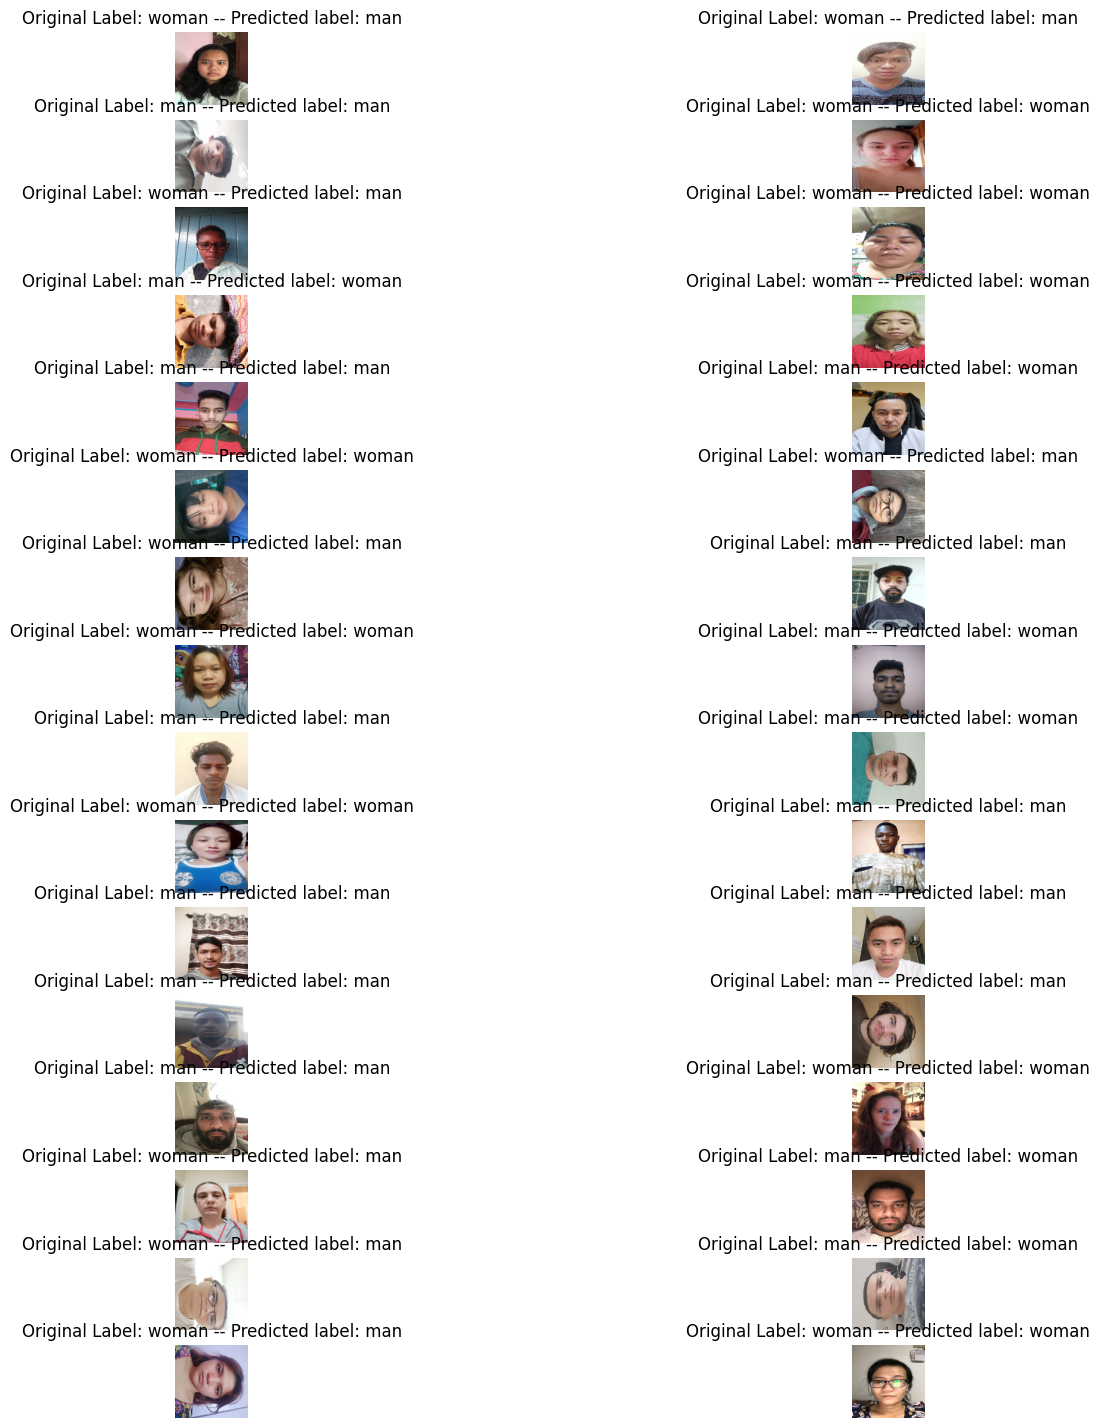

In [47]:
#testing on test dataset
for image, label in test_ds.take(1):
    plt.figure(figsize=(16, 18))
    for i in range(32):
        plt.subplot(16, 2, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        pred = model.predict(tf.expand_dims(image[i], axis=0))
        prediction = np.argmax(pred, axis=1)
        print(prediction)
        plt.title(f"Original Label: {class_names[label[i]]} -- Predicted label: {class_names[int(prediction)]}")
        plt.axis("off")

In [42]:
model.evaluate(train_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.9646 - loss: 10.7481


[10.789467811584473, 0.9681817889213562]

In [48]:
model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.5898 - loss: 13.5459


[13.338235855102539, 0.625]

In [51]:
model.save('gender detect.keras')